[View in Colaboratory](https://colab.research.google.com/github/WillArevalo/ML-Comparision-characters-FIFA2018/blob/master/Recommendation_fifa_18_data_set_kaggle.ipynb)

# Fifa 18 More Complete Player Dataset (Analytics)

## Conexión con la API de Kaggle para acceder el DataSet desde Colabority usando autenticación con Google Drive

In [91]:
!pip install kaggle

In [92]:
from googleapiclient.discovery import build
import io, os
from googleapiclient.http import MediaIoBaseDownload
from google.colab import auth
auth.authenticate_user()
drive_service = build('drive', 'v3')
results = drive_service.files().list(
        q="name = 'kaggle.json'", fields="files(id)").execute()
kaggle_api_key = results.get('files', [])
filename = "/content/.kaggle/kaggle.json"
os.makedirs(os.path.dirname(filename), exist_ok=True)
request = drive_service.files().get_media(fileId=kaggle_api_key[0]['id'])
fh = io.FileIO(filename, 'wb')
downloader = MediaIoBaseDownload(fh, request)
done = False
while done is False:
    status, done = downloader.next_chunk()
    print("Download %d%%." % int(status.progress() * 100))
os.chmod(filename, 600)

Download 100%.


### Descarga del DataSet

In [93]:
!kaggle datasets download -d kevinmh/fifa-18-more-complete-player-dataset -p /content/kaggle

fifa-18-more-complete-player-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


## Creación del Data Frame

In [94]:
import pandas as pd
import numpy as np
data = pd.read_csv('/content/kaggle/complete.csv', header=0, sep=',', quotechar='"')
data.head()

,ID,name,full_name,club,club_logo,special,age,league,birth_date,height_cm,...,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk
0,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Real Madrid CF,https://cdn.sofifa.org/18/teams/243.png,2228,32,Spanish Primera División,1985-02-05,185.0,...,False,False,False,False,False,False,False,False,False,False
1,158023,L. Messi,Lionel Messi,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2158,30,Spanish Primera División,1987-06-24,170.0,...,False,False,False,False,False,False,False,False,False,False
2,190871,Neymar,Neymar da Silva Santos Jr.,Paris Saint-Germain,https://cdn.sofifa.org/18/teams/73.png,2100,25,French Ligue 1,1992-02-05,175.0,...,False,False,False,False,False,False,False,False,False,False
3,176580,L. Suárez,Luis Suárez,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2291,30,Spanish Primera División,1987-01-24,182.0,...,False,False,False,False,False,False,False,False,False,False
4,167495,M. Neuer,Manuel Neuer,FC Bayern Munich,https://cdn.sofifa.org/18/teams/21.png,1493,31,German Bundesliga,1986-03-27,193.0,...,False,False,False,False,False,False,False,False,False,True


## Analisis Exploratorio de los datos

In [95]:
datacomparison = pd.DataFrame(data.loc[0:9, :])
datacomparison.head()


,ID,name,full_name,club,club_logo,special,age,league,birth_date,height_cm,...,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk
0,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Real Madrid CF,https://cdn.sofifa.org/18/teams/243.png,2228,32,Spanish Primera División,1985-02-05,185.0,...,False,False,False,False,False,False,False,False,False,False
1,158023,L. Messi,Lionel Messi,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2158,30,Spanish Primera División,1987-06-24,170.0,...,False,False,False,False,False,False,False,False,False,False
2,190871,Neymar,Neymar da Silva Santos Jr.,Paris Saint-Germain,https://cdn.sofifa.org/18/teams/73.png,2100,25,French Ligue 1,1992-02-05,175.0,...,False,False,False,False,False,False,False,False,False,False
3,176580,L. Suárez,Luis Suárez,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2291,30,Spanish Primera División,1987-01-24,182.0,...,False,False,False,False,False,False,False,False,False,False
4,167495,M. Neuer,Manuel Neuer,FC Bayern Munich,https://cdn.sofifa.org/18/teams/21.png,1493,31,German Bundesliga,1986-03-27,193.0,...,False,False,False,False,False,False,False,False,False,True


In [96]:
datacomparison[['rs', 'rf', 'st', 'cf', 'ls', 'lf', 'rw', 'ram', 'lw', 'cam']].head(10)


,rs,rf,st,cf,ls,lf,rw,ram,lw,cam
0,92.0,91.0,92.0,91.0,92.0,91.0,91.0,89.0,91.0,89.0
1,88.0,92.0,88.0,92.0,88.0,92.0,91.0,92.0,91.0,92.0
2,84.0,88.0,84.0,88.0,84.0,88.0,89.0,88.0,89.0,88.0
3,88.0,88.0,88.0,88.0,88.0,88.0,87.0,87.0,87.0,87.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,88.0,87.0,88.0,87.0,88.0,87.0,84.0,84.0,84.0,84.0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,82.0,87.0,82.0,87.0,82.0,87.0,88.0,88.0,88.0,88.0
8,77.0,81.0,77.0,81.0,77.0,81.0,80.0,83.0,80.0,83.0
9,87.0,84.0,87.0,84.0,87.0,84.0,82.0,81.0,82.0,81.0


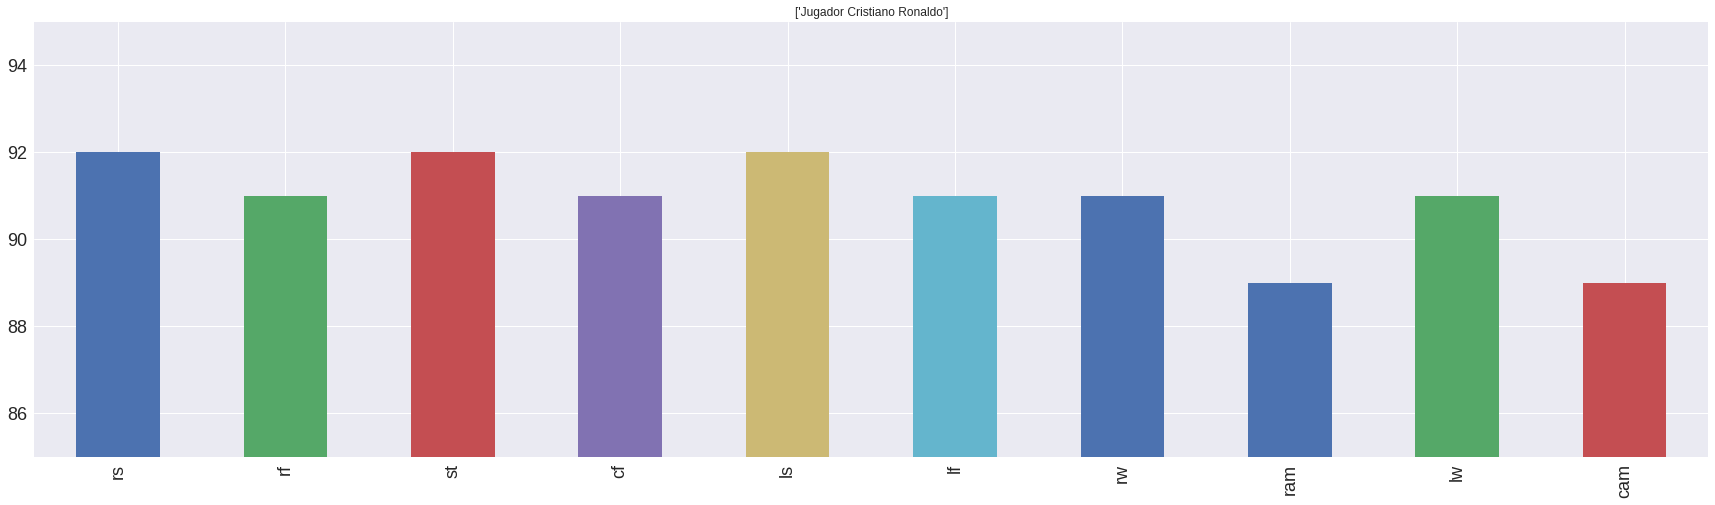

In [97]:
row = datacomparison[['rs', 'rf', 'st', 'cf', 'ls', 'lf', 'rw', 'ram', 'lw', 'cam']].iloc[0]
featchar = row.plot(kind='bar', figsize=(30, 8), fontsize=18)
featchar.set_title('Jugador '+datacomparison[['name']].iloc[0].values);
featchar.set_ylim(85, 95);


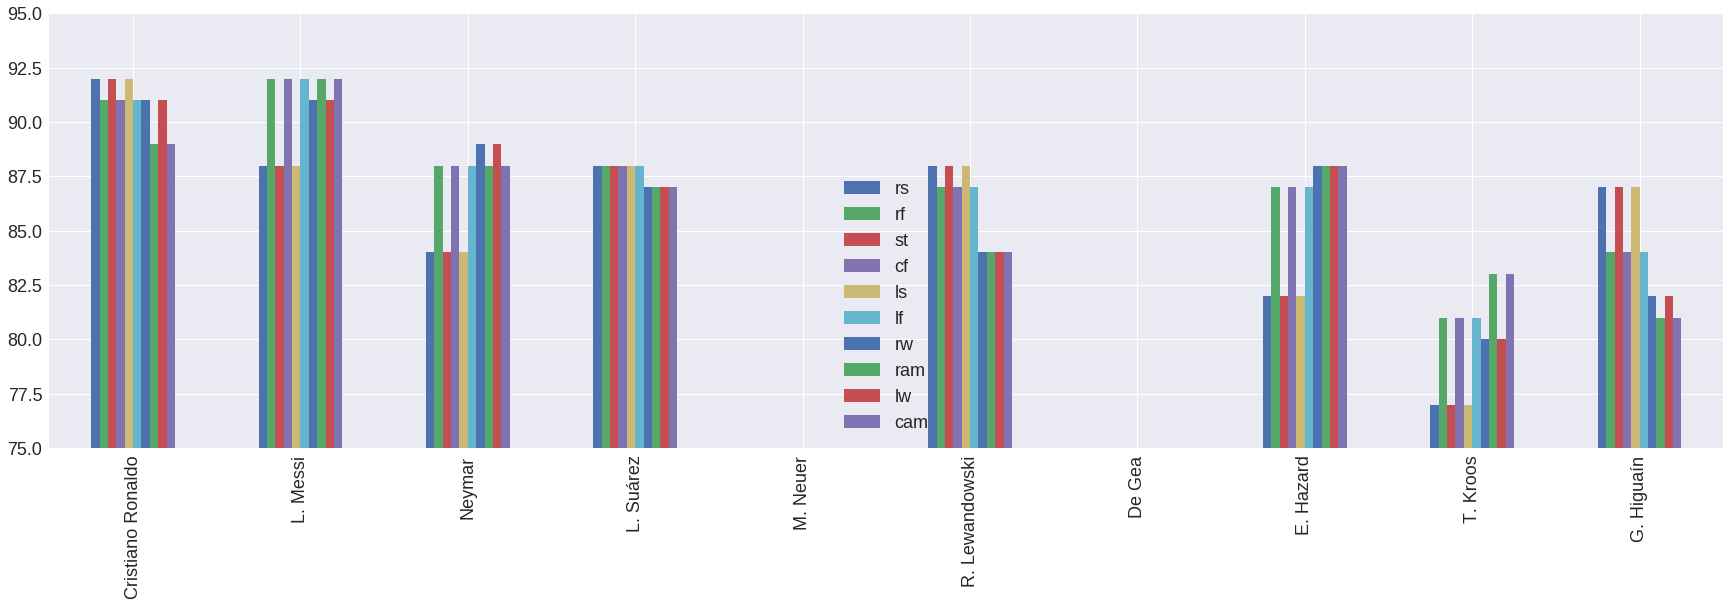

In [98]:
barsplot = datacomparison[['rs', 'rf', 'st', 'cf', 'ls', 'lf', 'rw', 'ram', 'lw', 'cam']].plot.bar(figsize=(30, 8), fontsize=18);
barsplot.legend(loc=8, prop={'size': 18});
barsplot.set_xticklabels(datacomparison.name, rotation=90);
barsplot.set_ylim(75, 95);

[0] 	=> 	['Cristiano Ronaldo']
[1] 	=> 	['L. Messi']
[2] 	=> 	['Neymar']
[3] 	=> 	['L. Suárez']
[4] 	=> 	['M. Neuer']
[5] 	=> 	['R. Lewandowski']
[6] 	=> 	['De Gea']
[7] 	=> 	['E. Hazard']
[8] 	=> 	['T. Kroos']
[9] 	=> 	['G. Higuaín']


Graficos


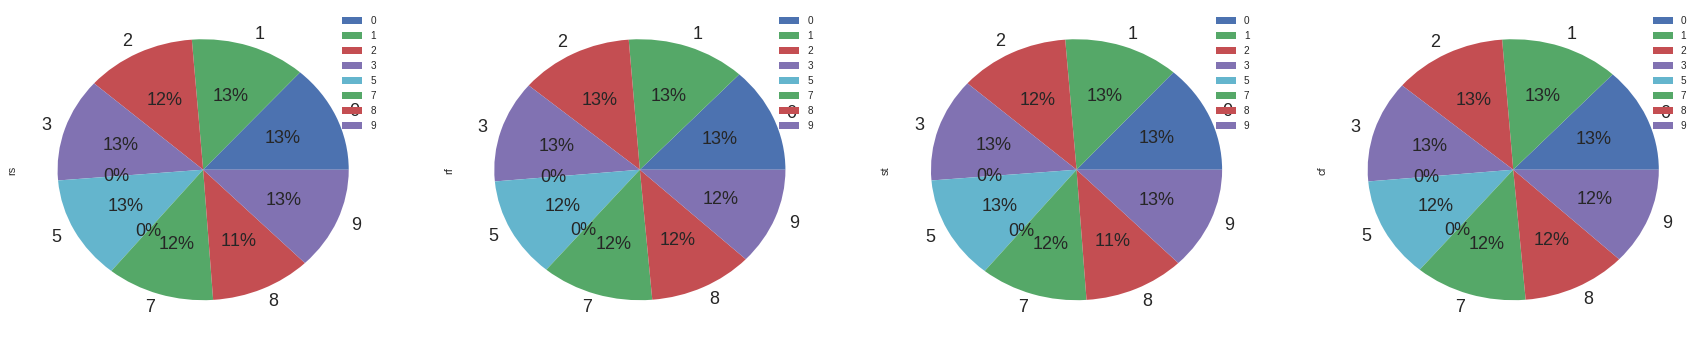

In [99]:
ftplot = datacomparison[['rs', 'rf', 'st', 'cf']].plot.pie(subplots=True, figsize=(30, 6),  autopct='%1.0f%%', fontsize=18)
for i in range(datacomparison.shape[0]):
  print("""{} \t=> \t{}""".format(datacomparison.loc[i:i, :].index.values, datacomparison[['name']].loc[i, :].values))
  
print("\n\n\033[1mGraficos\033[0m")

No handles with labels found to put in legend.
No handles with labels found to put in legend.




[0] 	=> 	['Cristiano Ronaldo']
[1] 	=> 	['L. Messi']
[2] 	=> 	['Neymar']
[3] 	=> 	['L. Suárez']
[4] 	=> 	['M. Neuer']
[5] 	=> 	['R. Lewandowski']
[6] 	=> 	['De Gea']
[7] 	=> 	['E. Hazard']
[8] 	=> 	['T. Kroos']
[9] 	=> 	['G. Higuaín']


Graficos


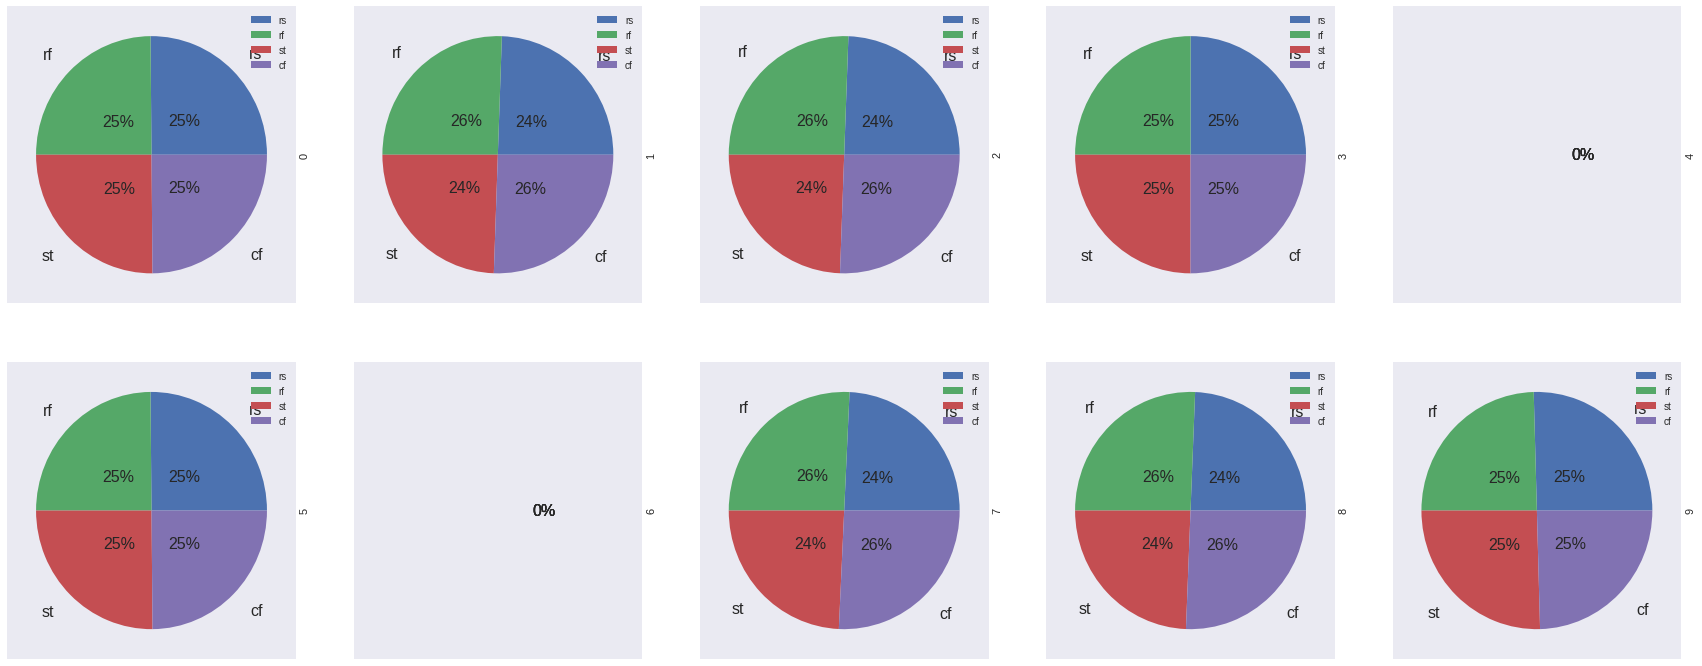

In [100]:
piechar = datacomparison[['rs', 'rf', 'st', 'cf']].T.plot.pie(subplots=True, figsize=(30, 12), secondary_y=True, autopct='%1.0f%%', pctdistance=0.4, labeldistance=1.2, layout=(2, 5), fontsize=16);
print("\n")
for i in range(datacomparison.shape[0]):
  print("""{} \t=> \t{}""".format(datacomparison.loc[i:i, :].index.values, datacomparison[['name']].loc[i, :].values))
  
print("\n\n\033[1mGraficos\033[0m")

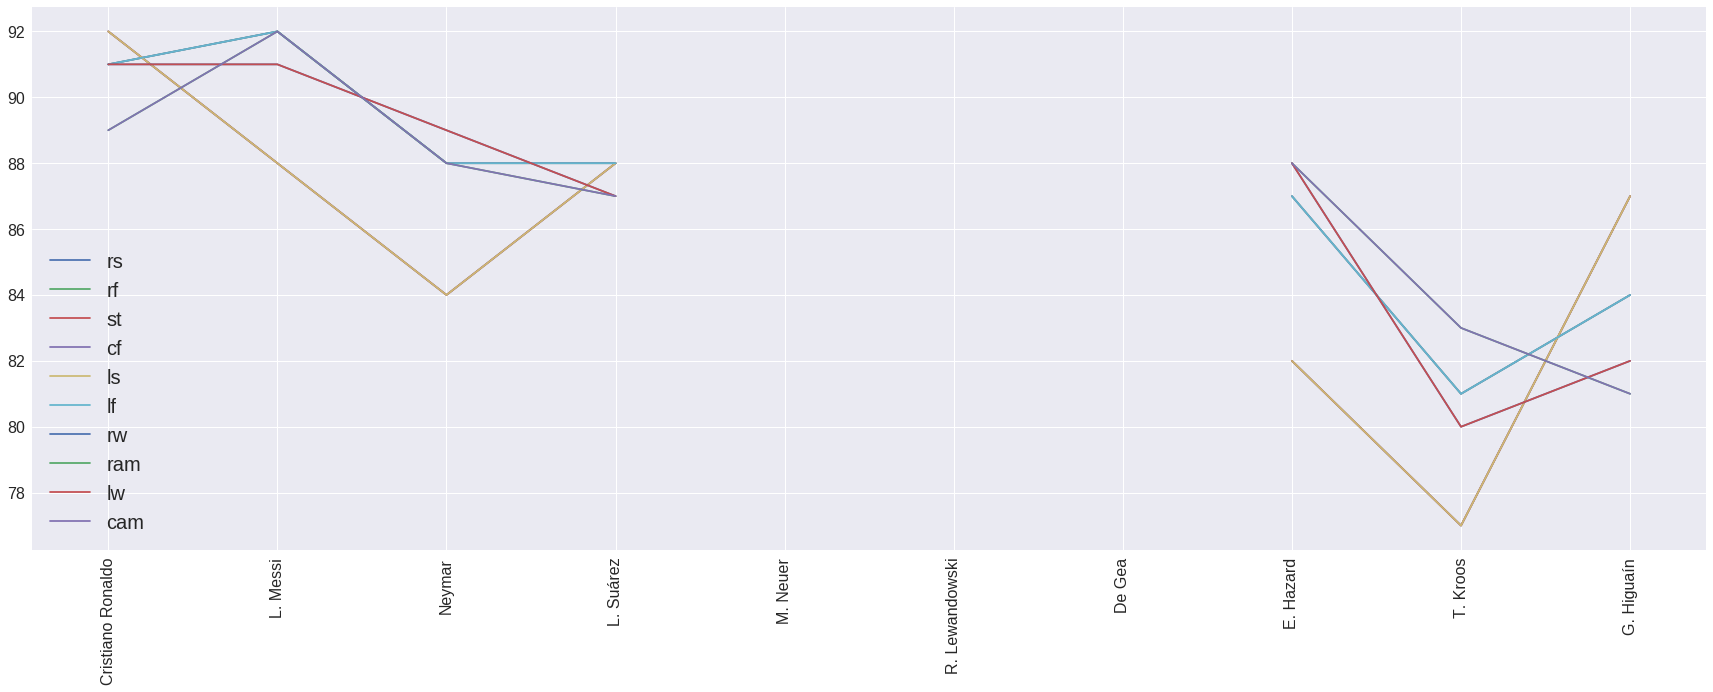

In [101]:
ax = datacomparison[['rs', 'rf', 'st', 'cf', 'ls', 'lf', 'rw', 'ram', 'lw', 'cam']].plot(figsize=(30, 10),fontsize=16);
ax.set_xticks(datacomparison.index)
ax.set_xticklabels(datacomparison.name, rotation=90);
ax.legend(loc=3, prop={'size': 20})

***Dimensiones del DataSet***

In [102]:
print("""Dimensiones del dataset:
{} filas X {} columnas""".format(data.shape[0],data.shape[1]))

Dimensiones del dataset:
17994 filas X 185 columnas


***Algunas columnas del DataSet***

In [103]:
print("Nombre de columnas:")
data.columns

Nombre de columnas:


Index(['ID', 'name', 'full_name', 'club', 'club_logo', 'special', 'age',
       'league', 'birth_date', 'height_cm',
       ...
       'prefers_cb', 'prefers_lb', 'prefers_lwb', 'prefers_ls', 'prefers_lf',
       'prefers_lam', 'prefers_lcm', 'prefers_ldm', 'prefers_lcb',
       'prefers_gk'],
      dtype='object', length=185)

***Revisión de Indices***

In [104]:
print("Indices y pasos del indice:")
data.index

Indices y pasos del indice:


RangeIndex(start=0, stop=17994, step=1)

### Separación de variables según su tipo

>* ***Vamos a discriminar datos del club o nacionalidad debido a que nuestra intención principal es buscar jugadores similares sin importar su procendencia, con la intención de descubirir talentos no contemplados al enfocarnos solamente en ligas de renombre.***




In [105]:
print("Info del dataset:")
data.info()

Info del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17994 entries, 0 to 17993
Columns: 185 entries, ID to prefers_gk
dtypes: bool(92), float64(32), int64(48), object(13)
memory usage: 14.3+ MB


### Mascara de datos obj (Cadenas de Texto)

In [106]:
obj = (data.dtypes == object)
obj_cols = [c for c in obj.index if obj[c]]
#Obj que no se necesitan
useless_obj = ['name', 'club', 'club_logo', 'league','flag', 'nationality', 'photo', 'body_type', 'birth_date', 'work_rate_att', 'work_rate_def']

for item in useless_obj:
  obj_cols.remove(item)
  
print("Columnas que se conservan de tipo obj: ",obj_cols)  


Columnas que se conservan de tipo obj:  ['full_name', 'preferred_foot']


### Mascara de datos bool

Para este caso en nuestro modelo no vamos a tener en cuenta los datos booleanos porque describen una caracteristica propia de cada jugador, lo cual puede llevarnos a pensar que un jugador no es similar a otro aunque tengan puntajes de cada posicion muy similar.

In [107]:
boolean = (data.dtypes == bool)
boolean_cols = [c for c in boolean.index if boolean[c]]
print(boolean_cols)
print("Ninguna columna de tipo bool se conserva")

['real_face', '1_on_1_rush_trait', 'acrobatic_clearance_trait', 'argues_with_officials_trait', 'avoids_using_weaker_foot_trait', 'backs_into_player_trait', 'bicycle_kicks_trait', 'cautious_with_crosses_trait', 'chip_shot_trait', 'chipped_penalty_trait', 'comes_for_crosses_trait', 'corner_specialist_trait', 'diver_trait', 'dives_into_tackles_trait', 'diving_header_trait', 'driven_pass_trait', 'early_crosser_trait', "fan's_favourite_trait", 'fancy_flicks_trait', 'finesse_shot_trait', 'flair_trait', 'flair_passes_trait', 'gk_flat_kick_trait', 'gk_long_throw_trait', 'gk_up_for_corners_trait', 'giant_throw_in_trait', 'inflexible_trait', 'injury_free_trait', 'injury_prone_trait', 'leadership_trait', 'long_passer_trait', 'long_shot_taker_trait', 'long_throw_in_trait', 'one_club_player_trait', 'outside_foot_shot_trait', 'playmaker_trait', 'power_free_kick_trait', 'power_header_trait', 'puncher_trait', 'rushes_out_of_goal_trait', 'saves_with_feet_trait', 'second_wind_trait', 'selfish_trait', 's

### Mascara de datos númericos

**Special Feature**

Este valor es referente a lo especial que es el jugador en el mercado, lo cual nos lleva de nuevo a establecer que no es un dato que queremos evaluar, pues nuestra intención es encontrar alternativas nuevas.

In [108]:
data[['full_name','special']].tail()

,full_name,special
17989,Adam Kelsey,755
17990,Barry Richardson,832
17991,Jordan Young,1194
17992,Josh Lundstram,1302
17993,Leslie Sackey,1031


In [109]:
num = (data.dtypes == float) | (data.dtypes == int)
num_cols = [c for c in num.index if num[c]==True]

#Removemos reputación internacional por lo que ya destacabamos de descubrir talentos
useless_num = ['special','eur_value', 'eur_wage', 'eur_release_clause', 'international_reputation', 'sho', 'pas', 'dri', 'def', 'phy', 'skill_moves',  'composure', 'pac', 'ID']

for item in useless_num:
  num_cols.remove(item)
  
len(num_cols)
print("Columnas que se conservan de tipo num: ",num_cols)

Columnas que se conservan de tipo num:  ['age', 'height_cm', 'weight_kg', 'overall', 'potential', 'weak_foot', 'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes', 'rs', 'rw', 'rf', 'ram', 'rcm', 'rm', 'rdm', 'rcb', 'rb', 'rwb', 'st', 'lw', 'cf', 'cam', 'cm', 'lm', 'cdm', 'cb', 'lb', 'lwb', 'ls', 'lf', 'lam', 'lcm', 'ldm', 'lcb', 'gk']


## Se comprueba la limpieza

In [110]:
data_bool = data[boolean_cols]
data_bool.head(1)

,real_face,1_on_1_rush_trait,acrobatic_clearance_trait,argues_with_officials_trait,avoids_using_weaker_foot_trait,backs_into_player_trait,bicycle_kicks_trait,cautious_with_crosses_trait,chip_shot_trait,chipped_penalty_trait,...,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [111]:
data_num = data[num_cols]
data_num.head(1)

,age,height_cm,weight_kg,overall,potential,weak_foot,crossing,finishing,heading_accuracy,short_passing,...,cb,lb,lwb,ls,lf,lam,lcm,ldm,lcb,gk
0,32,185.0,80.0,94,94,4,85,94,88,83,...,53.0,61.0,66.0,92.0,91.0,89.0,82.0,62.0,53.0,NaN


In [112]:
data_num.describe()

,age,height_cm,weight_kg,overall,potential,weak_foot,crossing,finishing,heading_accuracy,short_passing,...,cb,lb,lwb,ls,lf,lam,lcm,ldm,lcb,gk
count,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,...,15973.000000,15973.000000,15973.000000,15973.000000,15973.000000,15973.000000,15973.000000,15973.000000,15973.000000,2021.000000
mean,25.120151,181.271980,75.400856,66.253029,71.200400,2.948927,49.806046,45.330388,52.379293,58.338891,...,55.553747,56.990985,57.710574,58.216115,59.042384,59.262819,58.515244,56.871220,55.553747,64.714003
std,4.617428,6.690392,6.994824,6.946729,6.082015,0.661107,18.436764,19.479680,17.395498,14.867599,...,12.183008,9.773546,9.119380,9.162295,9.898161,9.845668,8.844482,10.285525,12.183008,7.661938
min,16.000000,155.000000,49.000000,46.000000,46.000000,1.000000,5.000000,2.000000,4.000000,10.000000,...,25.000000,30.000000,31.000000,31.000000,27.000000,27.000000,30.000000,26.000000,25.000000,46.000000
25%,21.000000,177.000000,70.000000,62.000000,67.000000,3.000000,38.000000,29.000000,45.000000,53.000000,...,45.000000,50.000000,51.000000,52.000000,53.000000,53.000000,53.000000,49.000000,45.000000,59.000000
50%,25.000000,181.000000,75.000000,66.000000,71.000000,3.000000,54.000000,48.000000,56.000000,62.000000,...,57.000000,58.000000,58.000000,59.000000,60.000000,60.000000,59.000000,58.000000,57.000000,65.000000
75%,28.000000,186.000000,80.000000,71.000000,75.000000,3.000000,64.000000,61.750000,64.000000,68.000000,...,65.000000,64.000000,64.000000,65.000000,66.000000,66.000000,65.000000,65.000000,65.000000,70.000000
max,47.000000,205.000000,110.000000,94.000000,94.000000,5.000000,90.000000,95.000000,94.000000,92.000000,...,87.000000,84.000000,85.000000,92.000000,92.000000,92.000000,87.000000,85.000000,87.000000,92.000000


### Entiendiendo los datos con Gráficas

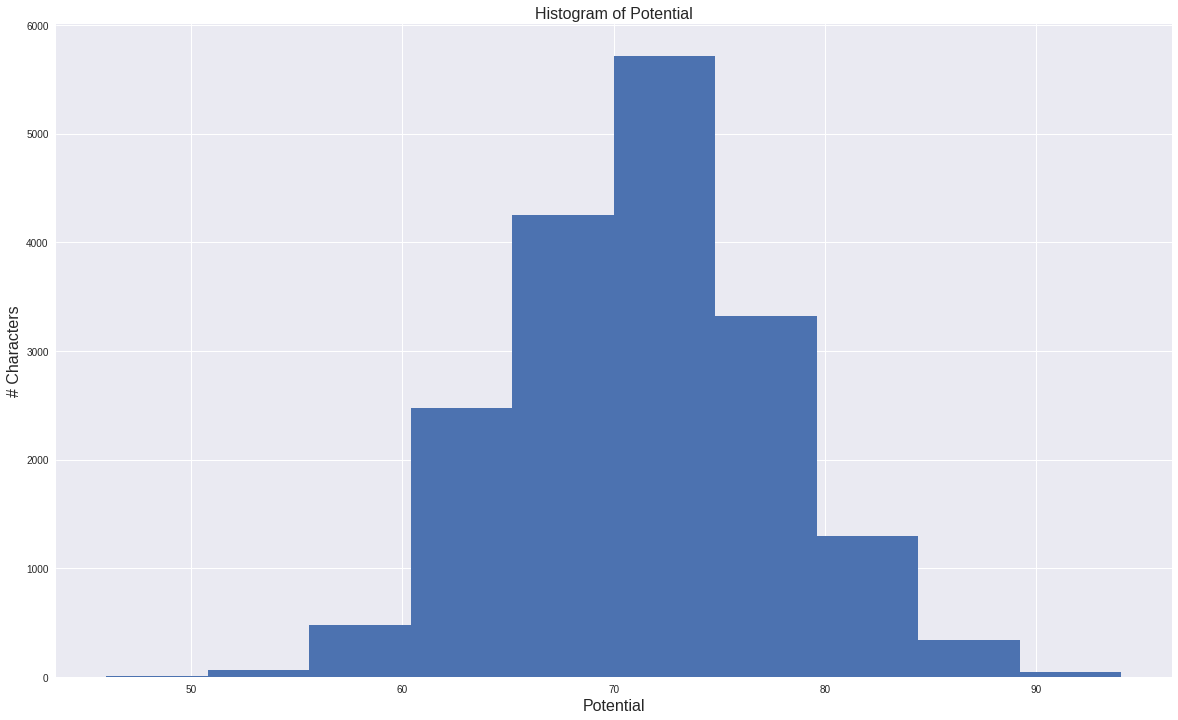

In [113]:
pote_hist = data_num['potential'].hist(figsize=(20,12))
pote_hist.set_title("Histogram of Potential", fontsize=16);
pote_hist.set_xlabel("Potential",fontsize=16);
pote_hist.set_ylabel("# Characters", fontsize=16);

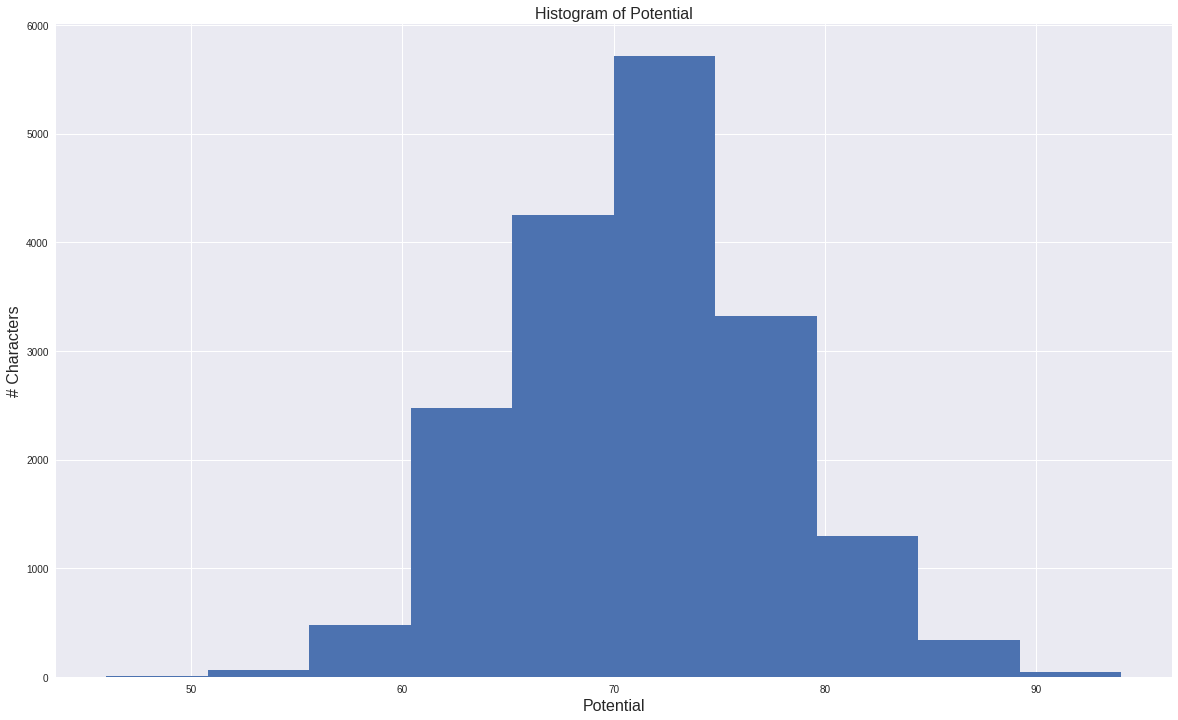

In [114]:
pote_hist = data_num['potential'].hist(figsize=(20,12))
pote_hist.set_title("Histogram of Potential", fontsize=16);
pote_hist.set_xlabel("Potential", fontsize=16);
pote_hist.set_ylabel("# Characters", fontsize=16);

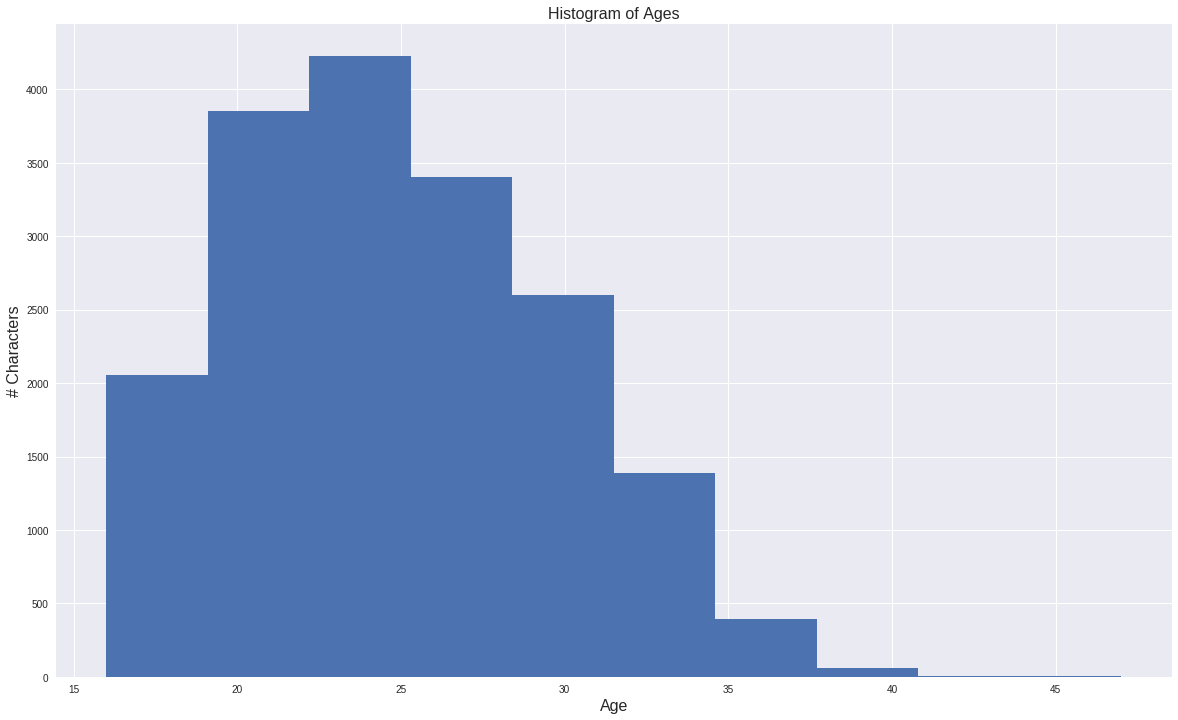

In [115]:
age_hist = data_num['age'].hist(figsize=(20,12)) #Talvez se represente mejor en escala logaritmica colocando dentro de hist asi hist(log=True)
age_hist.set_title("Histogram of Ages",fontsize=16);
age_hist.set_xlabel("Age", fontsize=16);
age_hist.set_ylabel("# Characters", fontsize=16);

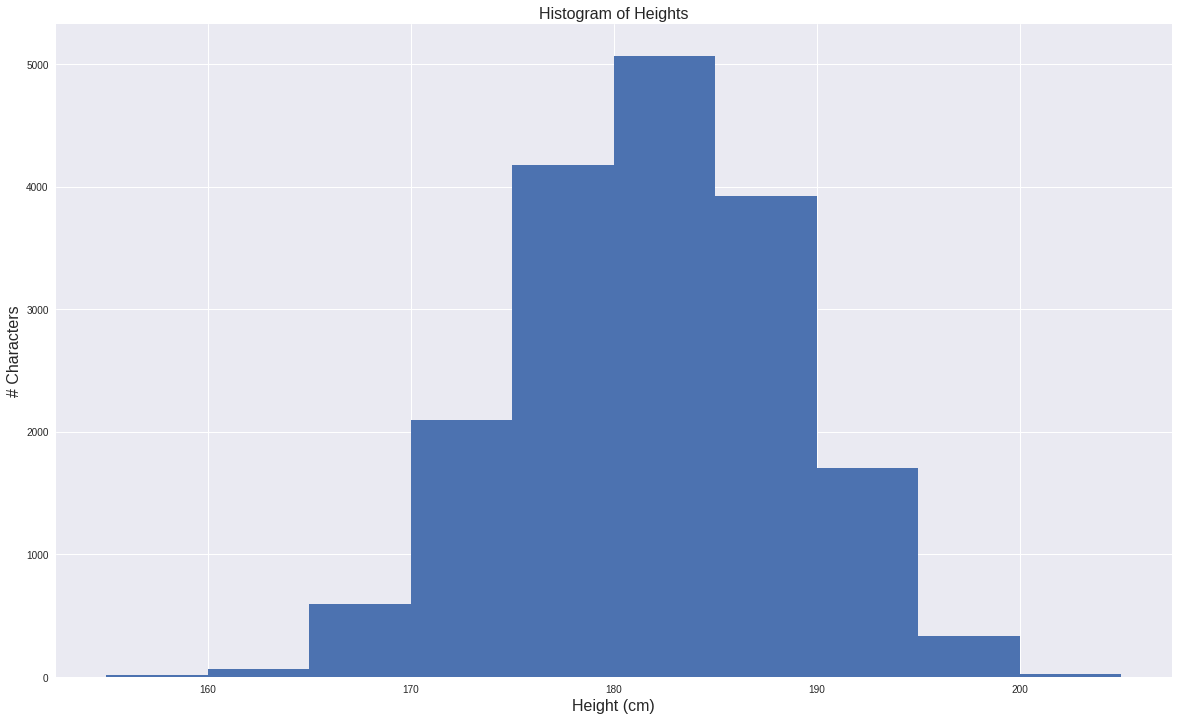

In [116]:
age_hist = data_num['height_cm'].hist(figsize=(20,12))
age_hist.set_title("Histogram of Heights", fontsize=16);
age_hist.set_xlabel("Height (cm)", fontsize=16);
age_hist.set_ylabel("# Characters", fontsize=16);

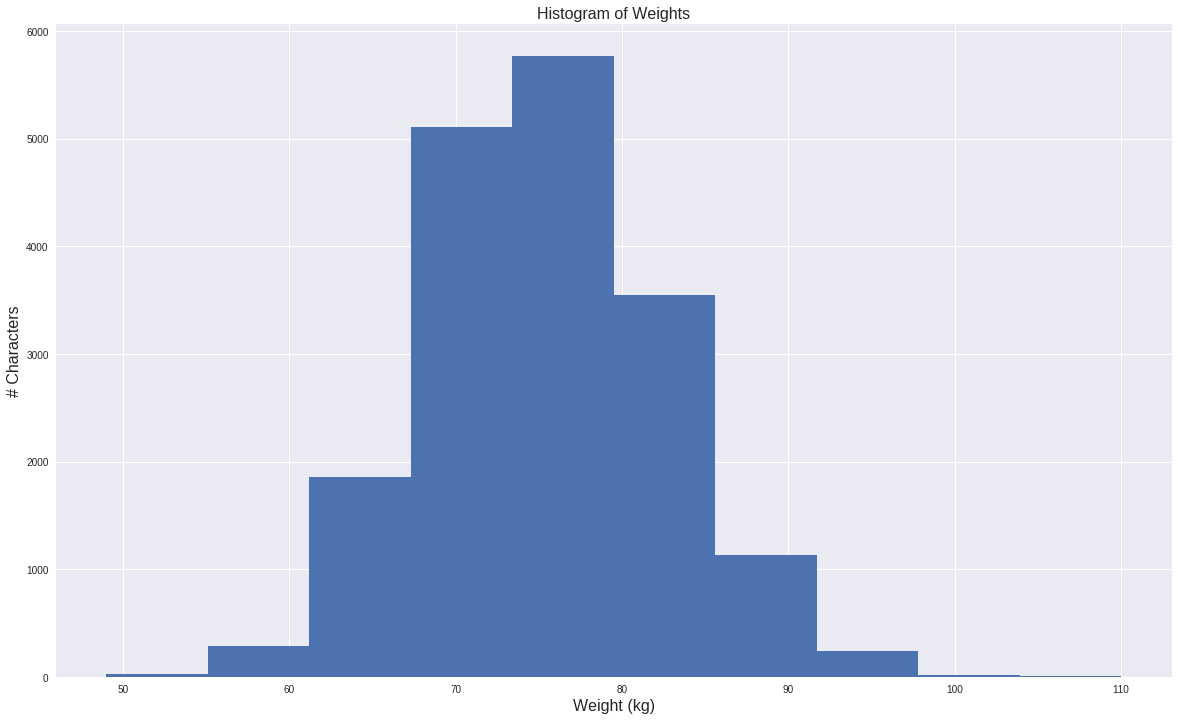

In [117]:
age_hist = data_num['weight_kg'].hist(figsize=(20,12))
age_hist.set_title("Histogram of Weights", fontsize=16);
age_hist.set_xlabel("Weight (kg)", fontsize=16);
age_hist.set_ylabel("# Characters", fontsize=16);

In [0]:
comparison_data = data[obj_cols + num_cols]

In [119]:
comparison_data.head()

,full_name,preferred_foot,age,height_cm,weight_kg,overall,potential,weak_foot,crossing,finishing,...,cb,lb,lwb,ls,lf,lam,lcm,ldm,lcb,gk
0,C. Ronaldo dos Santos Aveiro,Right,32,185.0,80.0,94,94,4,85,94,...,53.0,61.0,66.0,92.0,91.0,89.0,82.0,62.0,53.0,NaN
1,Lionel Messi,Left,30,170.0,72.0,93,93,4,77,95,...,45.0,57.0,62.0,88.0,92.0,92.0,84.0,59.0,45.0,NaN
2,Neymar da Silva Santos Jr.,Right,25,175.0,68.0,92,94,5,75,89,...,46.0,59.0,64.0,84.0,88.0,88.0,79.0,59.0,46.0,NaN
3,Luis Suárez,Right,30,182.0,86.0,92,92,4,77,94,...,58.0,64.0,68.0,88.0,88.0,87.0,80.0,65.0,58.0,NaN
4,Manuel Neuer,Right,31,193.0,92.0,92,92,4,15,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.0


In [120]:
data.shape

(17994, 185)

In [121]:
comparison_data.shape

(17994, 68)

In [122]:
comparison_data.columns

Index(['full_name', 'preferred_foot', 'age', 'height_cm', 'weight_kg',
       'overall', 'potential', 'weak_foot', 'crossing', 'finishing',
       'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve',
       'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration',
       'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power',
       'jumping', 'stamina', 'strength', 'long_shots', 'aggression',
       'interceptions', 'positioning', 'vision', 'penalties', 'marking',
       'standing_tackle', 'sliding_tackle', 'gk_diving', 'gk_handling',
       'gk_kicking', 'gk_positioning', 'gk_reflexes', 'rs', 'rw', 'rf', 'ram',
       'rcm', 'rm', 'rdm', 'rcb', 'rb', 'rwb', 'st', 'lw', 'cf', 'cam', 'cm',
       'lm', 'cdm', 'cb', 'lb', 'lwb', 'ls', 'lf', 'lam', 'lcm', 'ldm', 'lcb',
       'gk'],
      dtype='object')

full_name, work_rate_att, work_rate_def, ID, pac, sho, pas, dri, def, phy, skill_moves,  composure

In [123]:
messi = comparison_data.iloc[[1]]
messi

,full_name,preferred_foot,age,height_cm,weight_kg,overall,potential,weak_foot,crossing,finishing,...,cb,lb,lwb,ls,lf,lam,lcm,ldm,lcb,gk
1,Lionel Messi,Left,30,170.0,72.0,93,93,4,77,95,...,45.0,57.0,62.0,88.0,92.0,92.0,84.0,59.0,45.0,NaN


**Convirtiendo valores de tipo obj a bool**

In [124]:
comparison_data = comparison_data.rename(index=str, columns={"preferred_foot": "prefered_foot_left"})
comparison_data['prefered_foot_left'] = comparison_data['prefered_foot_left'].replace({'Left': 1, 'Right': 0})
comparison_data.head()

,full_name,prefered_foot_left,age,height_cm,weight_kg,overall,potential,weak_foot,crossing,finishing,...,cb,lb,lwb,ls,lf,lam,lcm,ldm,lcb,gk
0,C. Ronaldo dos Santos Aveiro,0,32,185.0,80.0,94,94,4,85,94,...,53.0,61.0,66.0,92.0,91.0,89.0,82.0,62.0,53.0,NaN
1,Lionel Messi,1,30,170.0,72.0,93,93,4,77,95,...,45.0,57.0,62.0,88.0,92.0,92.0,84.0,59.0,45.0,NaN
2,Neymar da Silva Santos Jr.,0,25,175.0,68.0,92,94,5,75,89,...,46.0,59.0,64.0,84.0,88.0,88.0,79.0,59.0,46.0,NaN
3,Luis Suárez,0,30,182.0,86.0,92,92,4,77,94,...,58.0,64.0,68.0,88.0,88.0,87.0,80.0,65.0,58.0,NaN
4,Manuel Neuer,0,31,193.0,92.0,92,92,4,15,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.0


## Comparación de prueba paso 4

In [125]:
jugador1 = comparison_data.loc[comparison_data['full_name'].isin(['Neymar da Silva Santos Jr.'])]
jugador2 = comparison_data.loc[comparison_data['full_name'].isin(['Luis Suárez'])]
print(jugador1.full_name[0]," VS ",jugador2.full_name[0])
jugador1 = jugador1.drop('full_name',axis=1)
jugador2 = jugador2.drop('full_name',axis=1)

Neymar da Silva Santos Jr.  VS  Luis Suárez


### Score Comparación de Similitud

In [126]:

diff = []  #Lista llamada diferentes en donde los valores 1 son similares y los valores 2 son deiferentes
for i in range(len(jugador1.values[0])):
  if (abs(jugador1.values[0][i] - jugador2.values[0][i])) < 3:
    diff.append(1)
  else:
    diff.append(0)
print(diff)

[1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0]


In [127]:
#from functools import reduce
#suma = 0
#suma = reduce((lambda x,y: x + y), diff)


import numpy as np
mymatrix = np.matrix([diff]) #esto no hace nada
print(mymatrix.shape)        #esto no hace nada
def myfunction( x ):
    return sum(x)

suma = np.apply_along_axis( myfunction, axis=0, arr=diff ) #axis 0 are rows, 1 are columns


#for el in diff:
#  suma += el
  
print(suma)


(1, 67)
21


## Busqueda de posiciones importantes

In [128]:
jugador1.columns

Index(['prefered_foot_left', 'age', 'height_cm', 'weight_kg', 'overall',
       'potential', 'weak_foot', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes', 'rs', 'rw', 'rf', 'ram', 'rcm', 'rm', 'rdm', 'rcb', 'rb',
       'rwb', 'st', 'lw', 'cf', 'cam', 'cm', 'lm', 'cdm', 'cb', 'lb', 'lwb',
       'ls', 'lf', 'lam', 'lcm', 'ldm', 'lcb', 'gk'],
      dtype='object')

In [129]:

jugador_pos = jugador1[['rs', 'rw', 'rf', 'ram', 'rcm', 'rm', 'rdm', 'rcb', 'rb',
       'rwb', 'st', 'lw', 'cf', 'cam', 'cm', 'lm', 'cdm', 'cb', 'lb', 'lwb',
       'ls', 'lf', 'lam', 'lcm', 'ldm', 'lcb', 'gk']]

type(jugador_pos)

pandas.core.frame.DataFrame

In [130]:

features_target = []
if not features_target :
  for i in range(3):
    features_target.append(jugador_pos.idxmax(axis = 1)[0])
    jugador_pos = jugador_pos.drop(features_target[i], axis=1)
  
print("3 mejores posiciones: ",features_target)


3 mejores posiciones:  ['rw', 'lw', 'rf']


### busqueda de coincidencia en posiciones destacadas de los demas jugadores

In [131]:
jugadores_pos = comparison_data[['rs', 'rw', 'rf', 'ram', 'rcm', 'rm', 'rdm', 'rcb', 'rb',
       'rwb', 'st', 'lw', 'cf', 'cam', 'cm', 'lm', 'cdm', 'cb', 'lb', 'lwb',
       'ls', 'lf', 'lam', 'lcm', 'ldm', 'lcb', 'gk']]
type(jugadores_pos.head())

pandas.core.frame.DataFrame

In [132]:
jugador_pos_base = jugador2[jugadores_pos.columns]

jugador_pos_1 = jugador2[jugadores_pos.columns]
jugador_pos_1.head()

,rs,rw,rf,ram,rcm,rm,rdm,rcb,rb,rwb,...,cb,lb,lwb,ls,lf,lam,lcm,ldm,lcb,gk
3,88.0,87.0,88.0,87.0,80.0,85.0,65.0,58.0,64.0,68.0,...,58.0,64.0,68.0,88.0,88.0,87.0,80.0,65.0,58.0,NaN


In [133]:
#Mejores 4 posiciones
features_find = []
for i in range(4): #si se cambia este muro se tendra la cantidad de posiciones con mayor puntaje
  features_find.append(jugador_pos_1.idxmax(axis = 1)[0])
  jugador_pos_1 = jugador_pos_1.drop(features_find[i], axis=1)

print("3 mejores posiciones: ",features_find)
print(type(features_find))

3 mejores posiciones:  ['rs', 'rf', 'st', 'cf']
<class 'list'>


In [134]:
jugador_3 = jugadores_pos.iloc[17993] #or jugadores_pos.iloc[[17993]] for show with format
jugador_3


rs     31.0
rw     29.0
rf     29.0
ram    29.0
rcm    30.0
rm     30.0
rdm    38.0
rcb    45.0
rb     40.0
rwb    38.0
st     31.0
lw     29.0
cf     29.0
cam    29.0
cm     30.0
lm     30.0
cdm    38.0
cb     45.0
lb     40.0
lwb    38.0
ls     31.0
lf     29.0
lam    29.0
lcm    30.0
ldm    38.0
lcb    45.0
gk      NaN
Name: 17993, dtype: float64

In [135]:
jugador_3.idxmax(axis = 1)


'rcb'

In [136]:
jugadores_pos.shape[0]

17994

### Revisión de mejores posiciones para cada jugador

In [308]:
from sklearn.metrics import jaccard_similarity_score
indice = int(input('Digita el indice que deseas \n'))
jugador_pos_base = comparison_data.iloc[[indice]]
print("""
Has escojido el jugador 
{} => {}
Este analisis tomara un tiempo por favor ten paciencia... """.format(jugador_pos_base.full_name.index.values[0], jugador_pos_base.full_name[0]))
jugador_pos_base = jugador_pos_base[jugadores_pos.columns]
similares = {}

nfeatures = 8
tasesimilarity = 0.5

result_feat_player = jugador_pos_base.max().nlargest(nfeatures)
columns = result_feat_player.index.values
print('Mientras esperas puedes saber que sus mejores {} posiciones son {}'.format(nfeatures,columns))

for row in jugadores_pos[columns].iterrows():                                                                                                                
  similarity = 0.0
  if np.all(np.isnan(row[1][columns].values)):
    pass
  else:
    similarity = jaccard_similarity_score(row[1][columns].values, jugador_pos_base[columns].values[0])
    if ( similarity > tasesimilarity ):   
      similares.update({comparison_data.iloc[[row[0]]]['full_name'][0]:similarity*100})

    
print("El analisis ha terminado exitosamente y ahora puedes continuar con la linea de ejecucion")
print("Se han econtrado {} resultados exitosos con una similaridad mayor a {}\n\n".format(len(similares),tasesimilarity*100))
similares

Digita el indice que deseas 
3500

Has escojido el jugador 
3500 => Markel Bergara Larrañaga
Este analisis tomara un tiempo por favor ten paciencia... 
Mientras esperas puedes saber que sus mejores 8 posiciones son ['rdm' 'cdm' 'ldm' 'rcb' 'cb' 'lcb' 'rcm' 'cm']
El analisis ha terminado exitosamente y ahora puedes continuar con la linea de ejecucion
Se han econtrado 40 resultados exitosos con una similaridad mayor a 50.0




{'Abel Aguilar': 62.5,
 'Alejandro Grimaldo García': 75.0,
 'Alexandre Song': 62.5,
 'Alexandru Gaţcan': 62.5,
 'Ander Capa Rodríguez': 62.5,
 'Anyelo Rolis': 75.0,
 'Arnaud Souquet': 75.0,
 'Artur Ioniţă': 75.0,
 'Aïssa Mandi': 62.5,
 'Bastian Oczipka': 62.5,
 'Benjamin Mendy': 62.5,
 'Christian Träsch': 75.0,
 'Cédric Ricardo Alves Soares': 75.0,
 'David Jefferson Seijalbo Vaz': 75.0,
 'Dmitriy Tarasov': 62.5,
 'Dominik Kohr': 62.5,
 'Erdem Şen': 62.5,
 'Gelson Tavares Fernandes': 100.0,
 'Guilherme dos Santos Torres': 75.0,
 'Gökhan İnler': 75.0,
 'Hugo Miguel Almeida Costa Lopes': 100.0,
 'Héctor Bellerín Moruno': 100.0,
 'Jaume Vicent Costa Jordá': 62.5,
 'Jetro Willems': 75.0,
 'Jordan Lukaku': 62.5,
 'José Juan Vázquez': 62.5,
 'Kieran Trippier': 75.0,
 'Leandro González Pirez': 75.0,
 'Lucas Deaux': 62.5,
 'Luka Milivojević': 75.0,
 'Luke Shaw': 62.5,
 'Markel Bergara Larrañaga': 100.0,
 'Nampalys Mendy': 75.0,
 'Papa Kouli Diop': 62.5,
 'Pavel Kadeřábek': 62.5,
 'Raúl García E

In [0]:
import operator
sorted_x = sorted(similares.items(), key=operator.itemgetter(1))

In [0]:
sorted_x.reverse()

In [311]:
print(type(sorted_x))
sorted_x[0:10]

<class 'list'>


[('Markel Bergara Larrañaga', 100.0),
 ('Gelson Tavares Fernandes', 100.0),
 ('Hugo Miguel Almeida Costa Lopes', 100.0),
 ('Héctor Bellerín Moruno', 100.0),
 ('Vincent Manceau', 75.0),
 ('Leandro González Pirez', 75.0),
 ('Artur Ioniţă', 75.0),
 ('Christian Träsch', 75.0),
 ('Luka Milivojević', 75.0),
 ('Nampalys Mendy', 75.0)]

In [312]:
#Solo los 10 mas similares

print("Obviamos que el primero es el mismo jugador que estamos comparando")
for i in range(11):
  print(i,"\t",sorted_x[i][0])
  
print("las posiciones mas destacadas de el jugador",columns)

Obviamos que el primero es el mismo jugador que estamos comparando
0 	 Markel Bergara Larrañaga
1 	 Gelson Tavares Fernandes
2 	 Hugo Miguel Almeida Costa Lopes
3 	 Héctor Bellerín Moruno
4 	 Vincent Manceau
5 	 Leandro González Pirez
6 	 Artur Ioniţă
7 	 Christian Träsch
8 	 Luka Milivojević
9 	 Nampalys Mendy
10 	 Arnaud Souquet
las posiciones mas destacadas de el jugador ['rdm' 'cdm' 'ldm' 'rcb' 'cb' 'lcb' 'rcm' 'cm']


In [313]:
sorted_x[2][0]

'Hugo Miguel Almeida Costa Lopes'

In [314]:
dffinal = pd.concat([pd.DataFrame(comparison_data.loc[comparison_data['full_name'].isin([sorted_x[i][0]])]) for i in range(10)], ignore_index=True)
dffinal

,full_name,prefered_foot_left,age,height_cm,weight_kg,overall,potential,weak_foot,crossing,finishing,...,cb,lb,lwb,ls,lf,lam,lcm,ldm,lcb,gk
0,Markel Bergara Larrañaga,0,31,181.0,78.0,72,72,3,58,65,...,74.0,69.0,68.0,63.0,64.0,67.0,71.0,75.0,74.0,NaN
1,Gelson Tavares Fernandes,0,30,179.0,70.0,76,76,3,61,51,...,74.0,73.0,73.0,64.0,66.0,67.0,71.0,75.0,74.0,NaN
2,Hugo Miguel Almeida Costa Lopes,0,30,182.0,83.0,78,78,4,82,40,...,74.0,77.0,77.0,65.0,67.0,68.0,71.0,75.0,74.0,NaN
3,Héctor Bellerín Moruno,0,22,178.0,74.0,81,88,3,76,52,...,74.0,80.0,80.0,66.0,71.0,71.0,71.0,75.0,74.0,NaN
4,Vincent Manceau,0,27,176.0,70.0,74,74,3,76,39,...,74.0,73.0,74.0,59.0,62.0,65.0,70.0,75.0,74.0,NaN
5,Leandro González Pirez,0,25,185.0,80.0,75,78,3,42,42,...,74.0,72.0,71.0,63.0,65.0,66.0,70.0,75.0,74.0,NaN
6,Artur Ioniţă,0,26,184.0,73.0,75,75,3,68,64,...,74.0,73.0,73.0,72.0,72.0,73.0,74.0,75.0,74.0,NaN
7,Christian Träsch,0,29,180.0,75.0,75,75,4,75,46,...,74.0,74.0,75.0,66.0,69.0,70.0,73.0,75.0,74.0,NaN
8,Luka Milivojević,0,26,186.0,80.0,76,80,2,59,54,...,74.0,72.0,71.0,67.0,67.0,68.0,72.0,75.0,74.0,NaN
9,Nampalys Mendy,0,25,168.0,68.0,76,80,3,67,49,...,74.0,74.0,74.0,64.0,67.0,70.0,72.0,75.0,74.0,NaN


In [0]:
#dffinal.to_csv('predictionLionel.csv')

In [0]:
#from google.colab import files
#files.download('predictionLionel.csv') 

In [317]:
print("Las posiciones mas destacas del jugador {} son: \n {}".format(dffinal.full_name.iloc[0],columns))
pos_name = columns.tolist()
pos_name.append('full_name')

dffinal[pos_name].loc[0:9, :]

Las posiciones mas destacas del jugador Markel Bergara Larrañaga son: 
 ['rdm' 'cdm' 'ldm' 'rcb' 'cb' 'lcb' 'rcm' 'cm']


,rdm,cdm,ldm,rcb,cb,lcb,rcm,cm,full_name
0,75.0,75.0,75.0,74.0,74.0,74.0,71.0,71.0,Markel Bergara Larrañaga
1,75.0,75.0,75.0,74.0,74.0,74.0,71.0,71.0,Gelson Tavares Fernandes
2,75.0,75.0,75.0,74.0,74.0,74.0,71.0,71.0,Hugo Miguel Almeida Costa Lopes
3,75.0,75.0,75.0,74.0,74.0,74.0,71.0,71.0,Héctor Bellerín Moruno
4,75.0,75.0,75.0,74.0,74.0,74.0,70.0,70.0,Vincent Manceau
5,75.0,75.0,75.0,74.0,74.0,74.0,70.0,70.0,Leandro González Pirez
6,75.0,75.0,75.0,74.0,74.0,74.0,74.0,74.0,Artur Ioniţă
7,75.0,75.0,75.0,74.0,74.0,74.0,73.0,73.0,Christian Träsch
8,75.0,75.0,75.0,74.0,74.0,74.0,72.0,72.0,Luka Milivojević
9,75.0,75.0,75.0,74.0,74.0,74.0,72.0,72.0,Nampalys Mendy


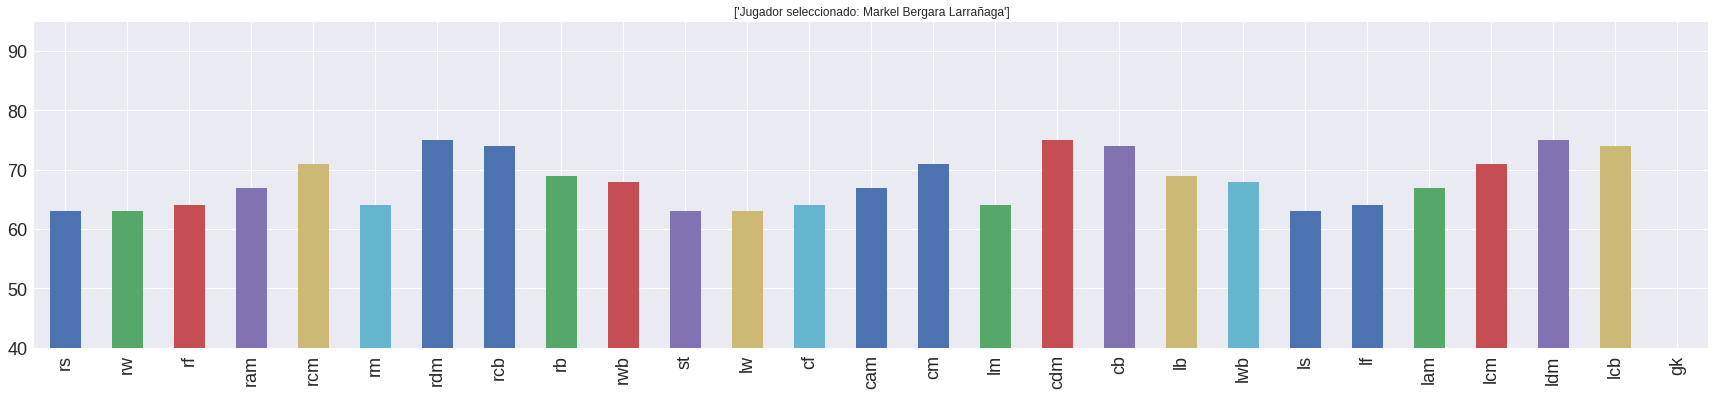

In [318]:
row = dffinal[jugadores_pos.columns].iloc[0]
featchar = row.plot(kind='bar', figsize=(30, 6), fontsize=18)
featchar.set_title('Jugador seleccionado: '+dffinal[['full_name']].iloc[0].values);
featchar.set_ylim(40, 95);

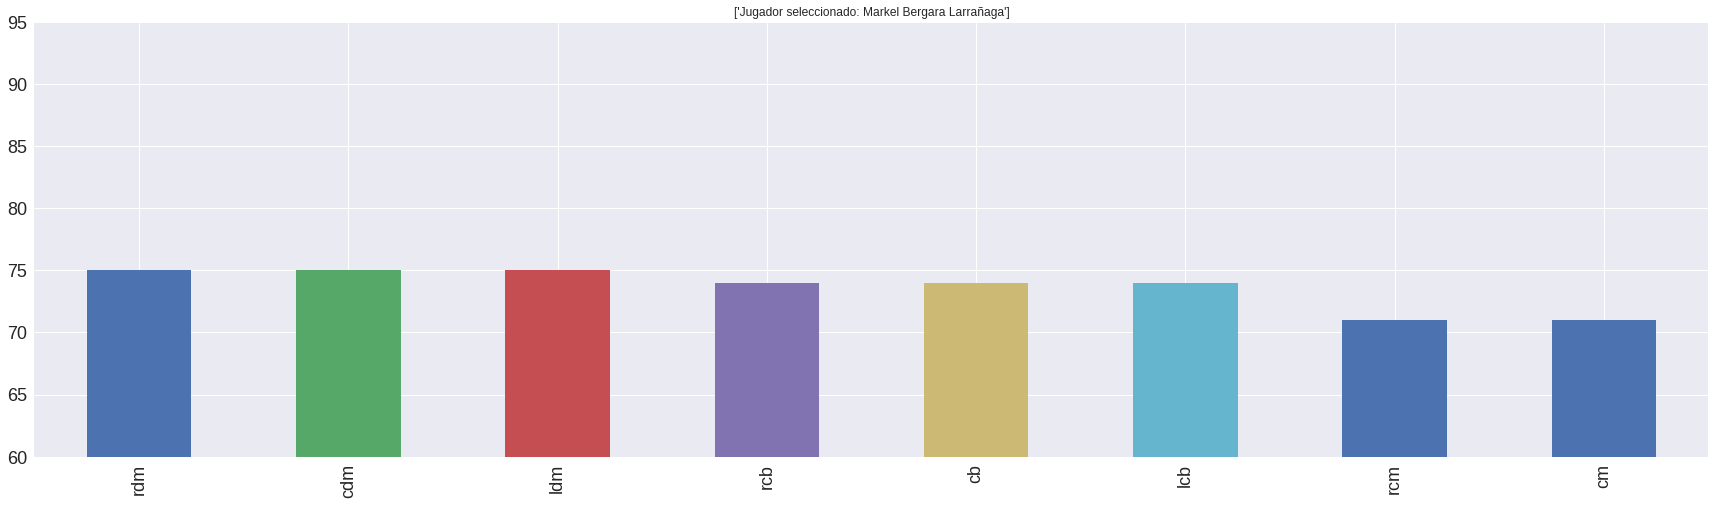

In [319]:
if "full_name" in columns:
  columns.remove("full_name")
row2 = dffinal[columns].iloc[0]
featchar = row2.plot(kind='bar', figsize=(30, 8), fontsize=18)
featchar.set_title('Jugador seleccionado: '+dffinal[['full_name']].iloc[0].values);
featchar.set_ylim(60, 95);

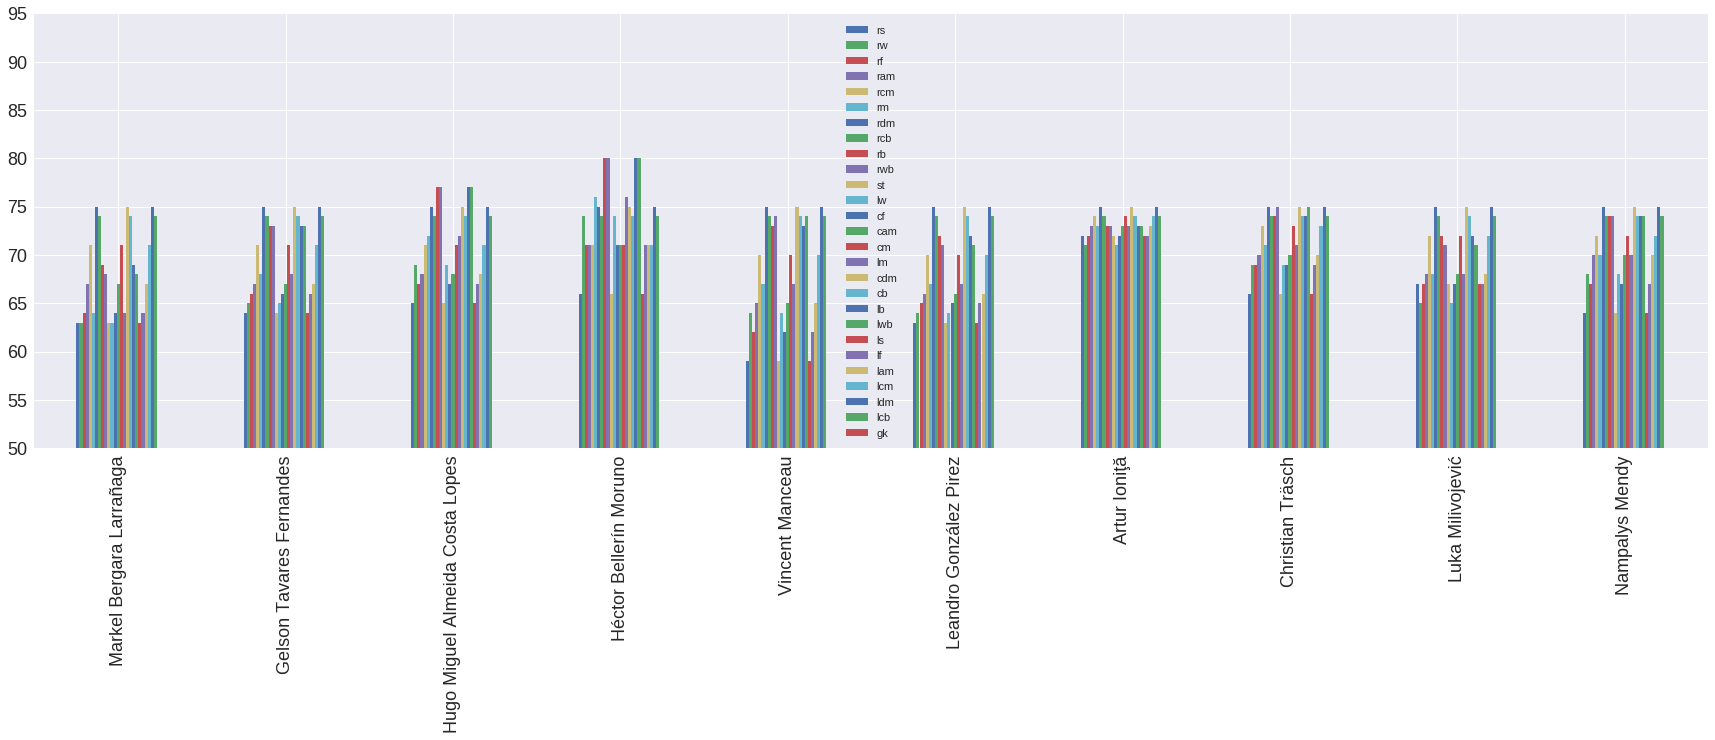

In [320]:
barsplot2 = dffinal[jugadores_pos.columns].plot.bar(figsize=(30, 8), fontsize=18);
barsplot2.legend(loc=8, prop={'size': 11});
barsplot2.set_xticklabels(dffinal.full_name, rotation=90);
barsplot2.set_ylim(50, 95);

[0] 	=> 	['Markel Bergara Larrañaga']
[1] 	=> 	['Gelson Tavares Fernandes']
[2] 	=> 	['Hugo Miguel Almeida Costa Lopes']
[3] 	=> 	['Héctor Bellerín Moruno']
[4] 	=> 	['Vincent Manceau']
[5] 	=> 	['Leandro González Pirez']
[6] 	=> 	['Artur Ioniţă']
[7] 	=> 	['Christian Träsch']
[8] 	=> 	['Luka Milivojević']
[9] 	=> 	['Nampalys Mendy']

Las posiciones mas destacadas de el jugador ['rdm' 'cdm' 'ldm' 'rcb' 'cb' 'lcb' 'rcm' 'cm']


Graficos


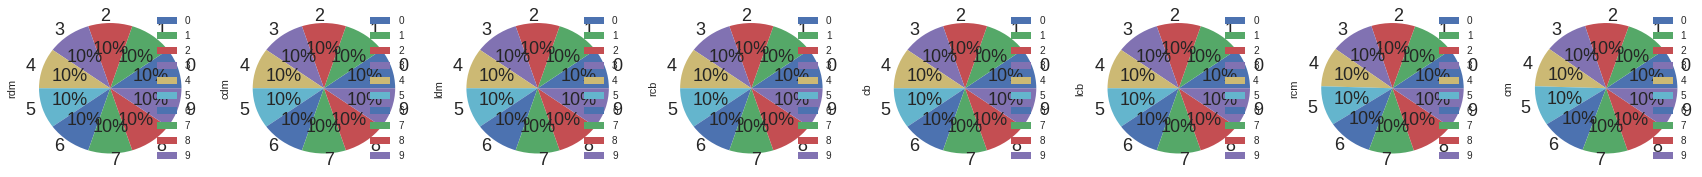

In [321]:
ftplot2 = dffinal[columns].plot.pie(subplots=True, figsize=(30, 3),  autopct='%1.0f%%', fontsize=18)
for i in range(dffinal.shape[0]):
  print("""{} \t=> \t{}""".format(dffinal.loc[i:i, :].index.values, dffinal[['full_name']].loc[i, :].values))
  
print("\nLas posiciones mas destacadas de el jugador",columns)
print("\n\n\033[1mGraficos\033[0m")



[0] 	=> 	['Markel Bergara Larrañaga']
[1] 	=> 	['Gelson Tavares Fernandes']
[2] 	=> 	['Hugo Miguel Almeida Costa Lopes']
[3] 	=> 	['Héctor Bellerín Moruno']
[4] 	=> 	['Vincent Manceau']
[5] 	=> 	['Leandro González Pirez']
[6] 	=> 	['Artur Ioniţă']
[7] 	=> 	['Christian Träsch']
[8] 	=> 	['Luka Milivojević']
[9] 	=> 	['Nampalys Mendy']


Graficos


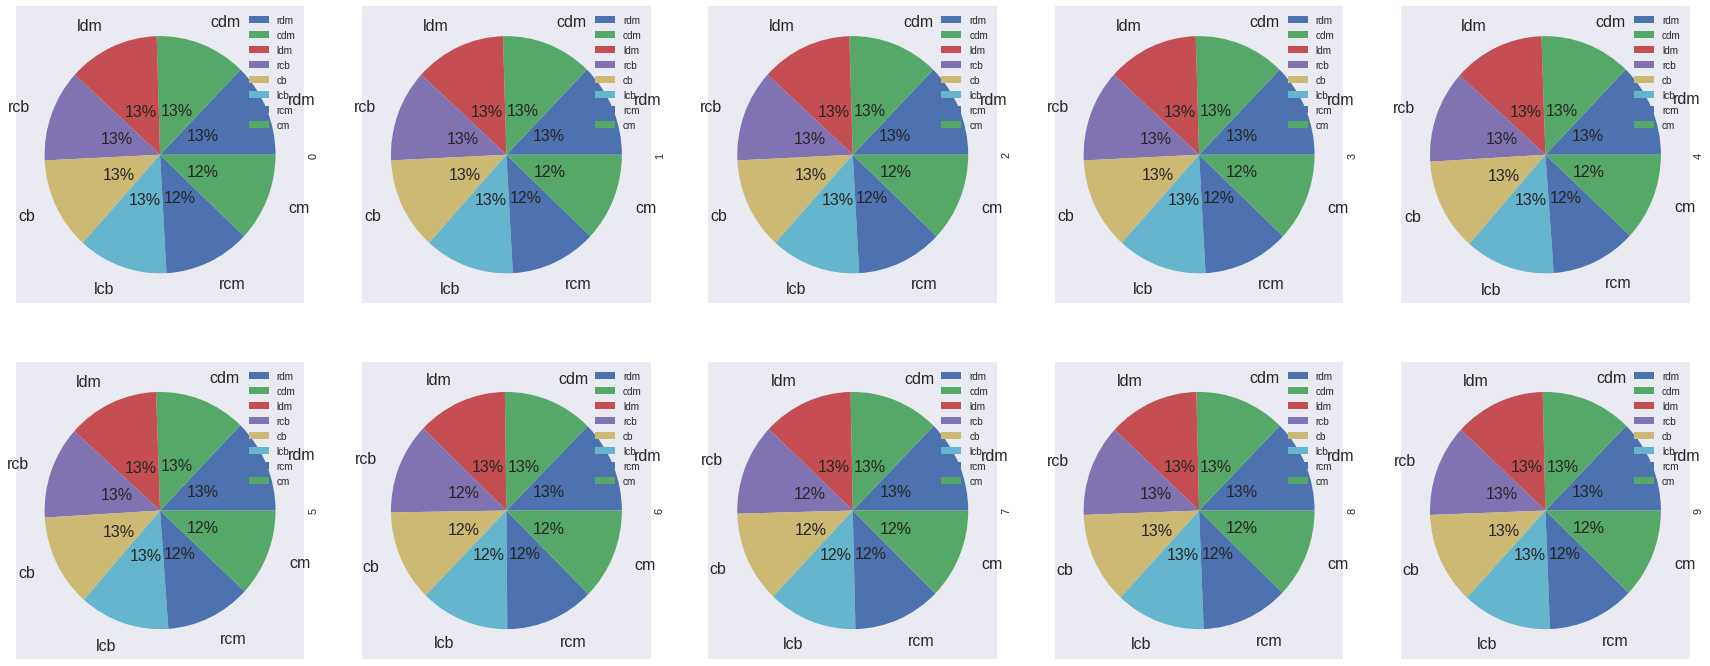

In [322]:
piechar2 = dffinal[columns].T.plot.pie(subplots=True, figsize=(30, 12), secondary_y=True, autopct='%1.0f%%', pctdistance=0.4, labeldistance=1.2, layout=(2, 5), fontsize=16);
print("\n")
for i in range(dffinal.shape[0]):
  print("""{} \t=> \t{}""".format(dffinal.loc[i:i, :].index.values, dffinal[['full_name']].loc[i, :].values))
  
print("\n\n\033[1mGraficos\033[0m")

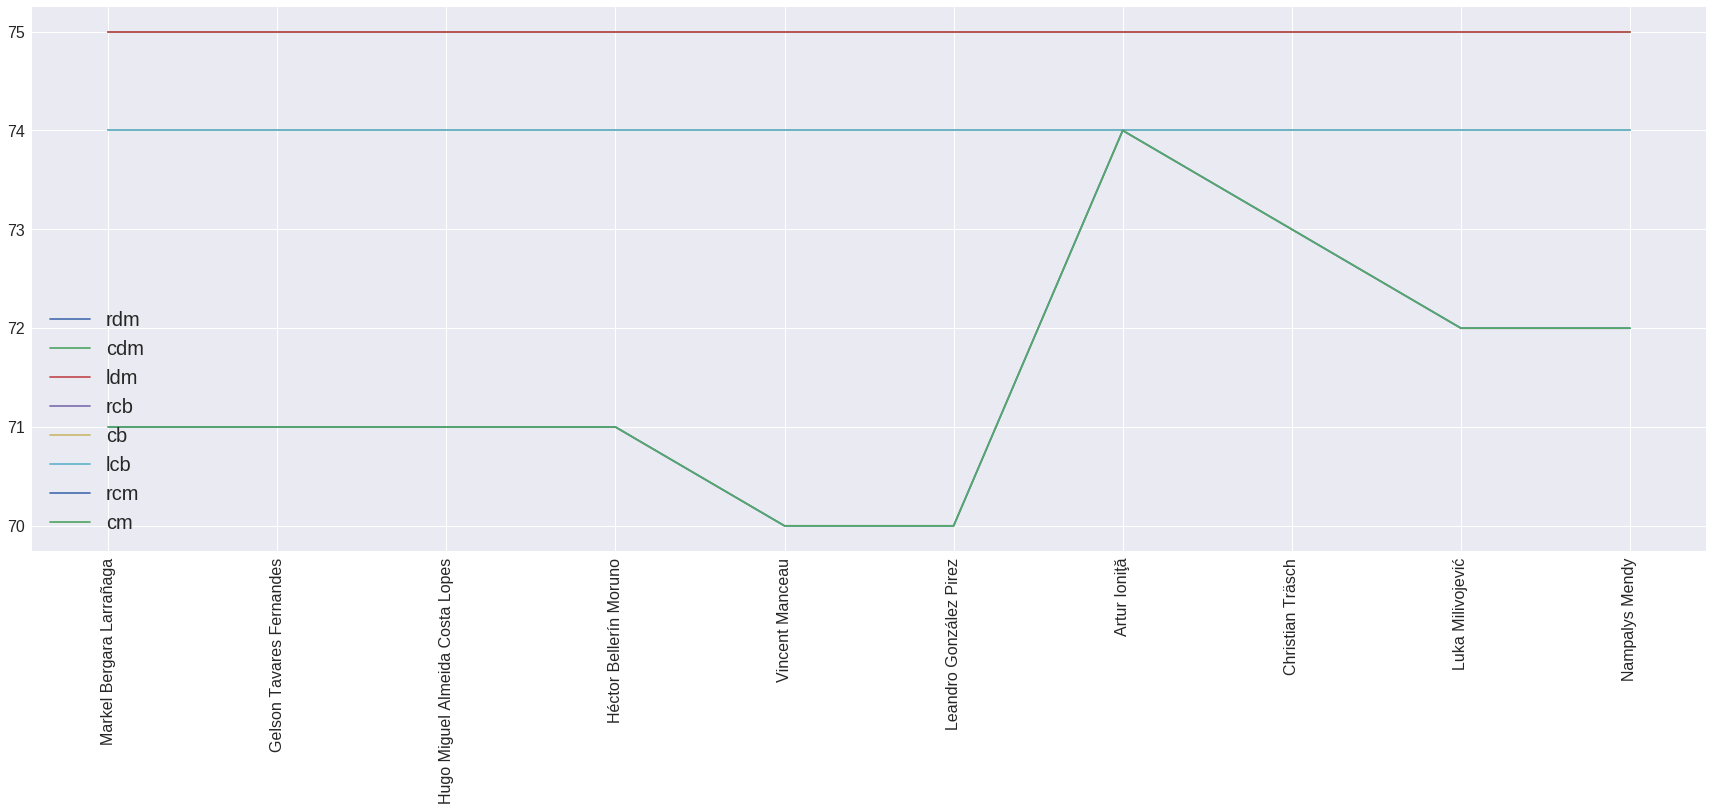

In [323]:
ax2 = dffinal[columns].plot(figsize=(30, 10),fontsize=16);
ax2.set_xticks(dffinal.index);
ax2.set_xticklabels(dffinal.full_name, rotation=90);
ax2.legend(loc=3, prop={'size': 20});

*Debido a que tanto Messi como Neymar tiene la puntuacion igual en todas sus posiciones, se ve graficamente una sola linea ya que las otras se estan pisando.*